In [1]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Velocidad_sin_Rangos.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


### EDA_Velocidad_sin_Rangos.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Información sobre la velocidad de conexión a internet sin rangos específicos, brindando datos detallados sobre la calidad del servicio en distintas áreas.

### Objetivo del Análisis
El propósito de este análisis es **evaluar el comportamiento de las velocidades de conexión sin agrupamientos 
predefinidos, detectando patrones de distribución y posibles diferencias en la infraestructura de conectividad.

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              18884 non-null  int64  
 1   Trimestre        18884 non-null  int64  
 2   Provincia        18884 non-null  object 
 3   Velocidad        18874 non-null  float64
 4   Accesos          18884 non-null  int64  
 5   Trimestre_Label  18884 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 885.3+ KB
None


In [3]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Provincia', 'Velocidad', 'Accesos', 'Trimestre_Label']


In [4]:
# Convertir la columna "Año" a datetime y luego extraer el año como entero
df['Año'] = pd.to_datetime(df['Año']).dt.year
print("La columna 'Año' ha sido convertida a tipo int.")
print(df.dtypes)

La columna 'Año' ha sido convertida a tipo int.
Año                  int32
Trimestre            int64
Provincia           object
Velocidad          float64
Accesos              int64
Trimestre_Label     object
dtype: object


In [5]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [6]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA',
        'CAPITAL FEDERAL': 'CABA',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.


In [7]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [8]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [9]:
import sweetviz as sv
from skimpy import skim

c:\Program Files\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              18884 non-null  int32  
 1   Trimestre        18884 non-null  int64  
 2   Provincia        18884 non-null  object 
 3   Velocidad        18874 non-null  float64
 4   Accesos          18884 non-null  int64  
 5   Trimestre_Label  18884 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 811.6+ KB
None
    Año  Trimestre     Provincia  Velocidad  Accesos Trimestre_Label
0  1970          2  BUENOS AIRES       75.0     1062              Q2
1  1970          2  BUENOS AIRES       59.0       59              Q2
2  1970          2  BUENOS AIRES      480.0        5              Q2
3  1970          2  BUENOS AIRES        3.0    41735              Q2
4  1970          2  BUENOS AIRES       18.0     1042              Q2


In [11]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 18884  │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA  ┃ NA %                  ┃ mean   ┃ sd     ┃ p0   ┃ p25  ┃ p50   ┃ p75  ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Año        │   0 │                     0 │   1970 │      0 │ 1970 │ 1970 │  1970 │ 1970 │    1970 │     ▇  │  │
│ │ Trimestre  │   0 │                     0 │  2.478 │  1.127 │    1 │    1 │     2 │    4 │       4 │ ▇ ▇ ▇▇ │  │
│ │ Velocidad  │  10 │  0.052954882440160986 │  96.02 │  379.8 │    0 │    4 │    12 │   50 │   10000 │   ▇    │  │
│ │ Accesos    │   0 │                     0 │  14120 │  68560 │    0 │   26 │ 672.5 │ 6114 │ 1346000 │   ▇    │  │
│ └────────────┴─────┴───────────────────────┴────────┴────────┴──────┴──────┴───────┴──────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃           ┃         ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min       ┃ max     ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Provincia  │  0 │    0 │ CABA     │ SANTIAGO   │ BUENOS    │ TUCUMÁN │       8.38 │       1.5 │      28859 │  │
│ │            │    │      │          │ DEL ESTERO │ AIRES     │         │            │           │            │  │
│ │ Trimestre_ │  0 │    0 │ Q2       │ Q2         │ Q1        │ Q4      │          2 │         1 │      18884 │  │
│ │ Label      │    │      │          │            │           │         │            │           │            │  │
│ └────────────┴────┴──────┴──────────┴────────────┴───────────┴─────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
            Año     Trimestre     Provincia     Velocidad       Accesos  \
count   18884.0  18884.000000         18884  18874.000000  1.888400e+04   
unique      NaN           NaN            24           NaN           NaN   
top         NaN           NaN  BUENOS AIRES           NaN           NaN   
freq        NaN           NaN          1730           NaN           NaN   
mean     1970.0      2.477653           NaN     96.022412  1.412328e+04   
std         0.0      1.126947           NaN    379.757062  6.856387e+04   
min      1970.0      1.000000           NaN      0.000000  0.000000e+00   
25%      1970.0      1.000000           NaN      4.000000  2.600000e+01   
50%      1970.0      2.000000           NaN     12.000000  6.725000e+02   
75%      1970.0      4.000000           NaN     50.000000  6.114000e+03   
max      1970.0      4.000000           NaN  10000.000000  1.346370e+06   

       Trimestre_Label  


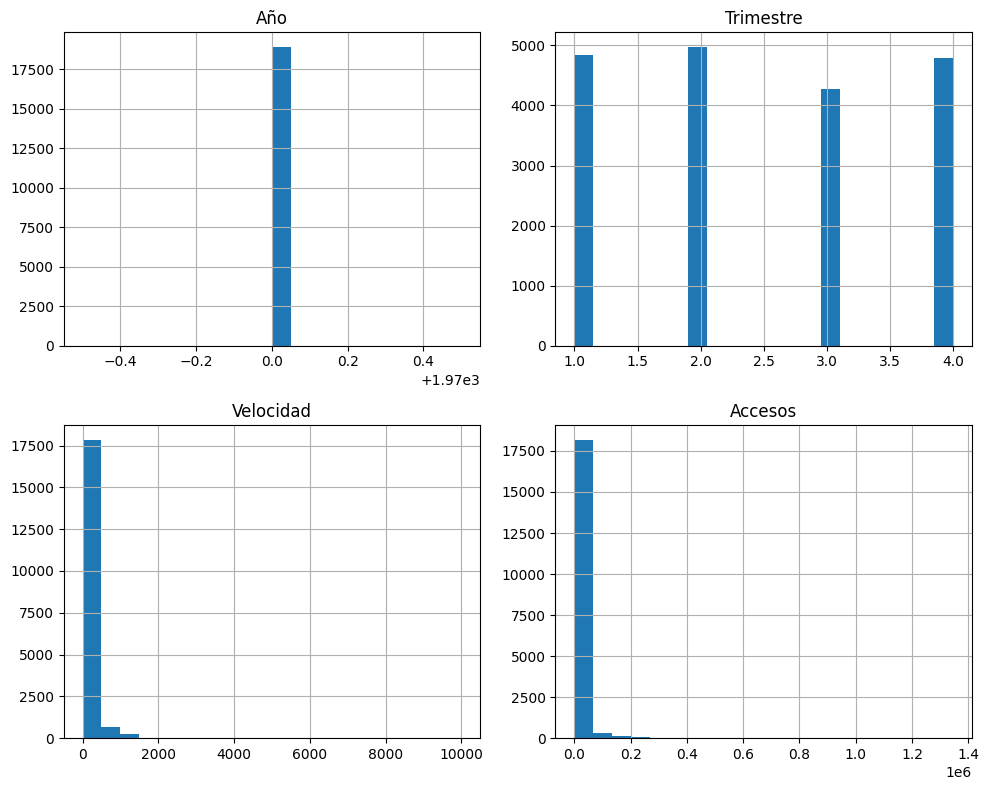

In [12]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
           Año  Trimestre  Velocidad   Accesos
Año        NaN        NaN        NaN       NaN
Trimestre  NaN   1.000000   0.000835 -0.000093
Velocidad  NaN   0.000835   1.000000 -0.015584
Accesos    NaN  -0.000093  -0.015584  1.000000


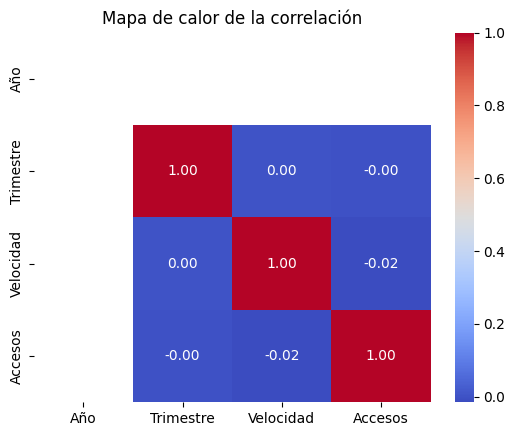

In [13]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [14]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label       Q1   Q2   Q3   Q4
Provincia                              
BUENOS AIRES         441  456  391  442
CABA                 338  342  298  338
CATAMARCA            130  138  118  131
CHACO                188  187  161  185
CHUBUT               175  185  153  172
CORRIENTES           164  170  146  164
CÓRDOBA              331  341  292  328
ENTRE RÍOS           194  197  173  196
FORMOSA              153  156  134  153
JUJUY                167  170  144  166
LA PAMPA             207  211  187  205
LA RIOJA             118  131  106  118
MENDOZA              215  217  188  213
MISIONES             199  203  175  203
NEUQUÉN              179  183  165  180
RÍO NEGRO            212  218  182  208
SALTA                174  176  151  172
SAN JUAN             151  151  131  144
SAN LUIS             144  145  129  141
SANTA CRUZ           169  177  148  164
SANTA FE             292  295  254  281
SANTIAGO DEL ESTERO  15

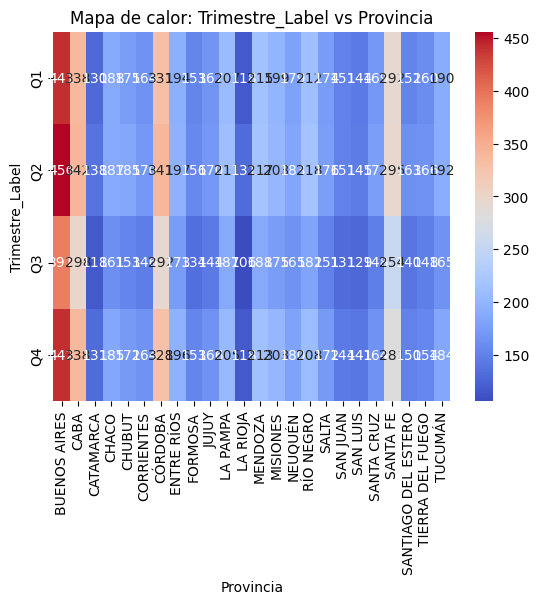

In [15]:
# Visualizar una tabla de contingencia específica como mapa de calor
tabla_contingencia = pd.crosstab(df['Trimestre_Label'], df['Provincia'])
sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
plt.title("Mapa de calor: Trimestre_Label vs Provincia")
plt.show()


In [16]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
       Año  Trimestre  Velocidad   Accesos
0      NaN  -0.423858        NaN -0.190503
1      NaN  -0.423858        NaN -0.205132
2      NaN  -0.423858        NaN -0.205920
3      NaN  -0.423858        NaN  0.402726
4      NaN  -0.423858        NaN -0.190795
...    ...        ...        ...       ...
18879  NaN   1.350896        NaN  0.453862
18880  NaN   1.350896        NaN -0.204884
18881  NaN   1.350896        NaN  0.147585
18882  NaN   1.350896        NaN -0.186988
18883  NaN   1.350896        NaN -0.142299

[18884 rows x 4 columns]


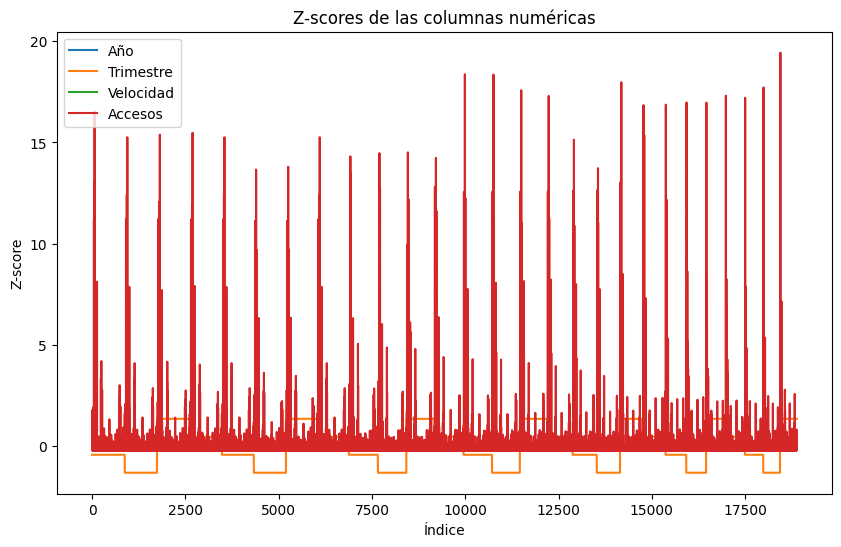

In [17]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [18]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           1730
CABA                   1316
CÓRDOBA                1292
SANTA FE               1122
MENDOZA                 833
RÍO NEGRO               820
LA PAMPA                810
MISIONES                780
ENTRE RÍOS              760
TUCUMÁN                 731
CHACO                   721
NEUQUÉN                 707
CHUBUT                  685
SALTA                   673
SANTA CRUZ              658
JUJUY                   647
CORRIENTES              644
TIERRA DEL FUEGO        628
SANTIAGO DEL ESTERO     605
FORMOSA                 596
SAN JUAN                577
SAN LUIS                559
CATAMARCA               517
LA RIOJA                473
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2    4970
Q1    4843
Q4    4792
Q3    4279
Name: count, dtype: int64


In [19]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


In [20]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Velocidad_sin_Rangos.csv


In [21]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año           0.000000
Trimestre     0.049937
Velocidad    14.302190
Accesos      11.228155
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año            0.000000
Trimestre     -1.377860
Velocidad    273.740752
Accesos      152.041174
dtype: float64


In [22]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
    Variable       VIF
0        Año  5.941100
1  Trimestre  1.000001
2  Velocidad  1.000244
3    Accesos  1.000243


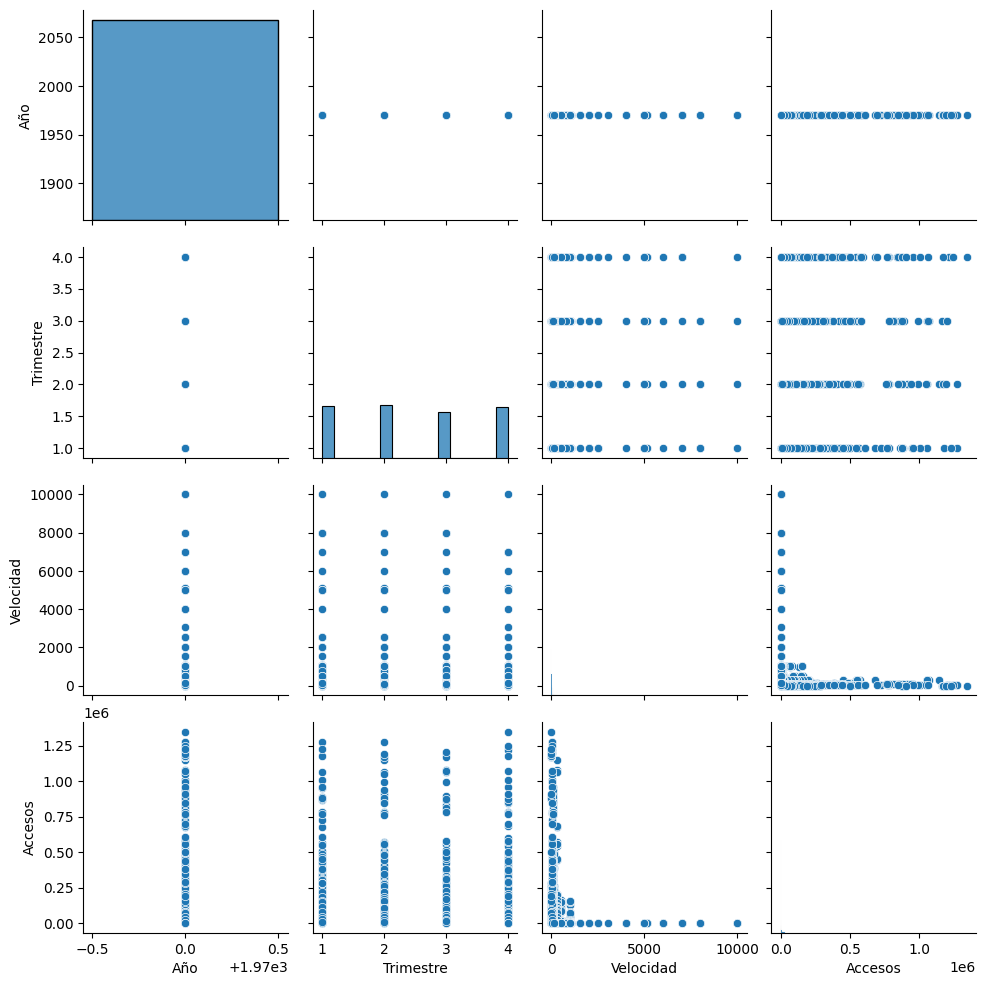

In [23]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [24]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                        Año                                               \
                      count    mean  std     min     25%     50%     75%   
Provincia                                                                  
BUENOS AIRES         1730.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CABA                 1316.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CATAMARCA             517.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CHACO                 721.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CHUBUT                685.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CORRIENTES            644.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CÓRDOBA              1292.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
ENTRE RÍOS            760.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
FORMOSA               596.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
JUJUY                 647.0  1970.0  0.0  1970.0

In [25]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
2641


In [26]:
# Identificar filas duplicadas
filas_duplicadas = df[df.duplicated()]
print("Filas duplicadas:")
print(filas_duplicadas)

Filas duplicadas:
        Año  Trimestre         Provincia  Velocidad  Accesos Trimestre_Label
437    1970          2          LA RIOJA        0.0        9              Q2
814    1970          2  TIERRA DEL FUEGO        0.0       11              Q2
918    1970          1      BUENOS AIRES       50.0        1              Q1
1303   1970          1          LA RIOJA        0.0        9              Q1
1675   1970          1  TIERRA DEL FUEGO        0.0       11              Q1
...     ...        ...               ...        ...      ...             ...
18840  1970          4          SANTA FE       22.0       24              Q4
18847  1970          4          SANTA FE       61.0        1              Q4
18848  1970          4          SANTA FE       97.0        1              Q4
18864  1970          4  TIERRA DEL FUEGO        0.0        6              Q4
18869  1970          4  TIERRA DEL FUEGO        4.0        1              Q4

[2641 rows x 6 columns]


   Accesos   Velocidad
0        0    0.000000
1        1  240.139359
2        2  214.108499
3        3  137.728232
4        4   86.288462


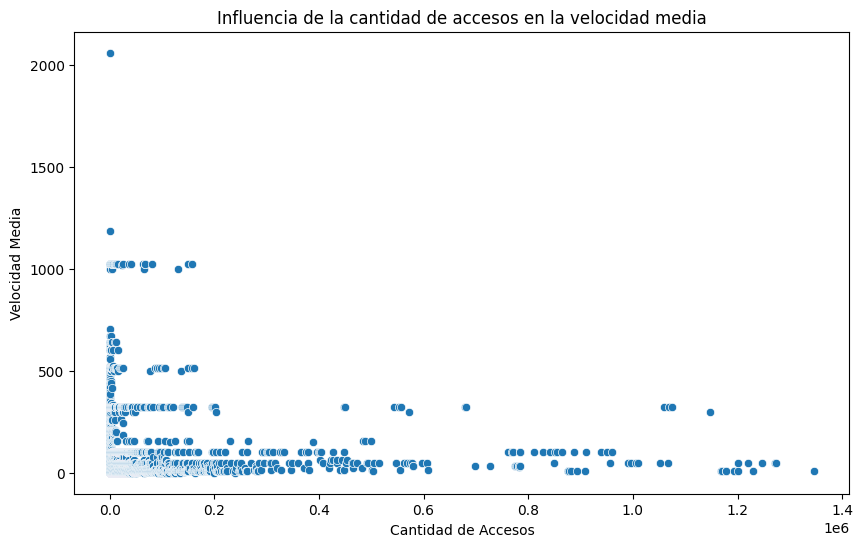

In [27]:
# Agrupar los datos por la cantidad de accesos y calcular la velocidad media
velocidad_media_por_accesos = df.groupby('Accesos')['Velocidad'].mean().reset_index()

# Mostrar los primeros resultados
print(velocidad_media_por_accesos.head())

# Visualizar la relación entre la cantidad de accesos y la velocidad media
plt.figure(figsize=(10, 6))
sns.scatterplot(data=velocidad_media_por_accesos, x='Accesos', y='Velocidad')
plt.title('Influencia de la cantidad de accesos en la velocidad media')
plt.xlabel('Cantidad de Accesos')
plt.ylabel('Velocidad Media')
plt.show()

Las 10 provincias con mayor cantidad de accesos en los últimos 10 años:
Provincia
BUENOS AIRES    114018496
CABA             38767454
CÓRDOBA          24500463
SANTA FE         22009532
ENTRE RÍOS        6808836
MENDOZA           6563914
TUCUMÁN           5971892
SALTA             4796228
MISIONES          4201855
RÍO NEGRO         3866745
Name: Total_Accesos, dtype: int64


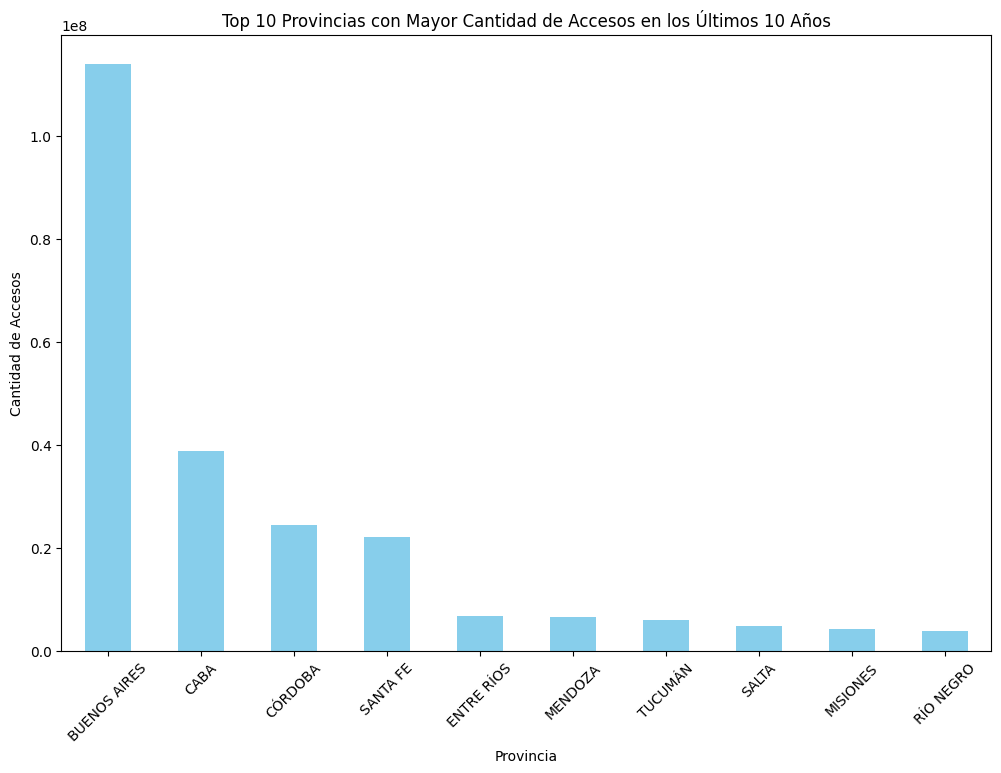

In [36]:
# Filtrar los datos de los últimos 10 años
df_ultimos_10_anos = df[df['Año'] >= (df['Año'].max() - 10)]

# Agrupar por provincia y año, y sumar los accesos
accesos_por_provincia_ano = df_ultimos_10_anos.groupby(['Provincia', 'Año'])['Accesos'].sum().reset_index()

# Pivotar la tabla para tener los años como columnas
accesos_pivot = accesos_por_provincia_ano.pivot(index='Provincia', columns='Año', values='Accesos').fillna(0)

# Calcular el total de accesos en los últimos 10 años
accesos_pivot['Total_Accesos'] = accesos_pivot.sum(axis=1)

# Ordenar por el total de accesos y seleccionar las 10 provincias con mayor cantidad de accesos
top_10_provincias_accesos = accesos_pivot['Total_Accesos'].sort_values(ascending=False).head(10)

# Mostrar las 10 provincias con mayor cantidad de accesos
print("Las 10 provincias con mayor cantidad de accesos en los últimos 10 años:")
print(top_10_provincias_accesos)

# Graficar las 10 provincias con mayor cantidad de accesos en los últimos 10 años
plt.figure(figsize=(12, 8))
top_10_provincias_accesos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Provincias con Mayor Cantidad de Accesos en los Últimos 10 Años')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=45)
plt.show()

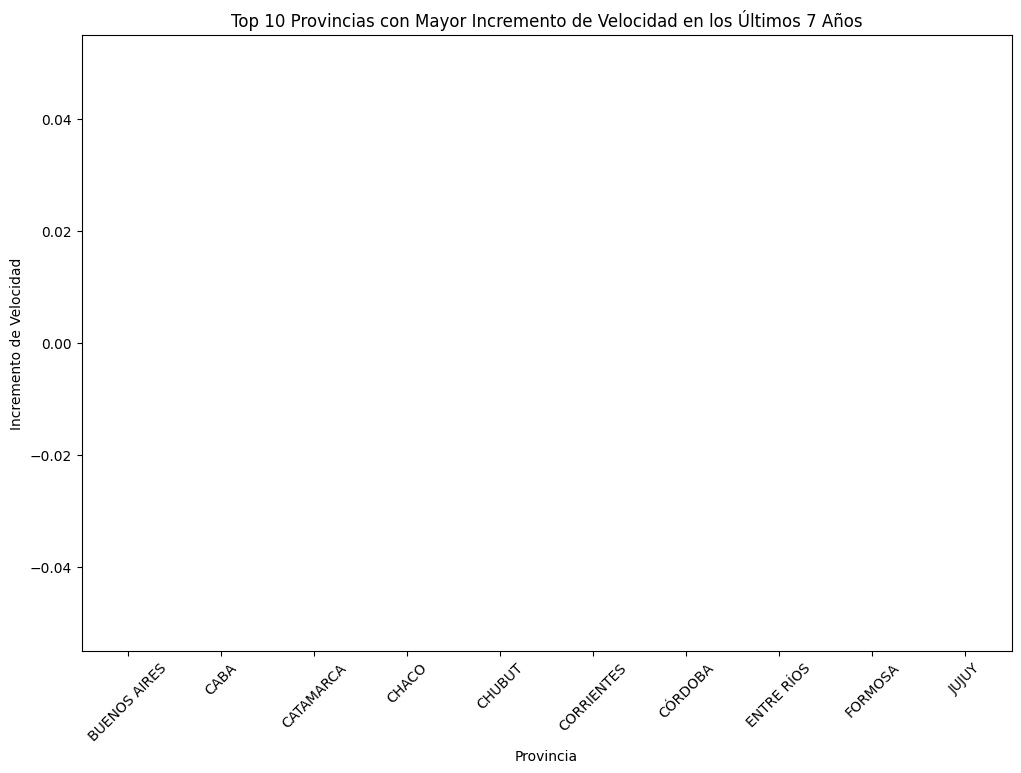

In [42]:
# Calcular el incremento de velocidad en los últimos 7 años
df_ultimos_7_anos = df[df['Año'] >= (df['Año'].max() - 7)]
velocidad_por_provincia_ano = df_ultimos_7_anos.groupby(['Provincia', 'Año'])['Velocidad'].mean().reset_index()

# Pivotar la tabla para tener los años como columnas
velocidad_pivot = velocidad_por_provincia_ano.pivot(index='Provincia', columns='Año', values='Velocidad').fillna(0)

# Calcular el incremento de velocidad en los últimos 7 años
velocidad_pivot['Incremento_Velocidad'] = velocidad_pivot.iloc[:, -1] - velocidad_pivot.iloc[:, 0]

# Ordenar por el incremento de velocidad y seleccionar las 10 provincias con mayor incremento
top_10_provincias_velocidad = velocidad_pivot['Incremento_Velocidad'].sort_values(ascending=False).head(10)

# Graficar las 10 provincias con mayor incremento de velocidad en los últimos 7 años
plt.figure(figsize=(12, 8))
top_10_provincias_velocidad.plot(kind='bar', color='skyblue')
plt.title('Top 10 Provincias con Mayor Incremento de Velocidad en los Últimos 7 Años')
plt.xlabel('Provincia')
plt.ylabel('Incremento de Velocidad')
plt.xticks(rotation=45)
plt.show()

# Análisis Exploratorio de Datos (EDA) - Velocidad de Conexión a Internet

## Introducción

Este proyecto realiza un análisis exploratorio de datos (EDA) sobre la velocidad de conexión a internet sin rangos específicos, utilizando datos proporcionados por el **Ente Nacional de Comunicaciones (ENACOM)** de Argentina. El objetivo es evaluar el comportamiento de las velocidades de conexión, detectar patrones de distribución y posibles diferencias en la infraestructura de conectividad.

## Contenido del Notebook

1. **Carga y Normalización de Datos**
    - Carga del archivo CSV y verificación de su existencia.
    - Normalización de nombres de columnas y reemplazo de variaciones específicas en los nombres de provincias, partidos y localidades.

2. **Exploración Inicial de Datos**
    - Información general del DataFrame.
    - Extracción y conversión de columnas específicas, como la columna "Año".
    - Resumen del DataFrame utilizando la librería `skimpy`.

3. **Análisis Estadístico y Visualización**
    - Estadísticas descriptivas para columnas numéricas y categóricas.
    - Histogramas de las columnas numéricas.
    - Matriz de correlación y mapa de calor para columnas numéricas.
    - Tablas de contingencia y mapas de calor para columnas categóricas.

4. **Cálculo de Z-scores**
    - Cálculo y visualización de Z-scores para columnas numéricas.

5. **Análisis de Distribuciones**
    - Cálculo de skewness (asimetría) y kurtosis (curtosis) para columnas numéricas.
    - Verificación de multicolinealidad entre variables numéricas utilizando el Factor de Inflación de la Varianza (VIF).

6. **Relaciones y Agrupamientos**
    - Visualización de relaciones entre variables numéricas mediante `pairplot`.
    - Agrupamiento de datos por categorías y cálculo de estadísticas descriptivas por grupo.

7. **Detección de Duplicados**
    - Identificación y conteo de filas duplicadas en el DataFrame.

8. **Análisis de Incrementos**
    - Análisis del incremento de accesos y velocidad de conexión en los últimos 7 años.
    - Visualización de las 10 provincias con mayor incremento de accesos y velocidad.

## Requisitos

- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Sweetviz
- Skimpy
- Scipy
- Statsmodels

## Uso

1. Clonar el repositorio o descargar el archivo Jupyter Notebook.
2. Asegurarse de tener instaladas todas las dependencias necesarias.
3. Ejecutar las celdas del notebook en orden para reproducir el análisis.

## Contribuciones

Las contribuciones son bienvenidas. Por favor, abre un issue o envía un pull request para discutir cualquier cambio que te gustaría realizar.

## Licencia

Este proyecto está bajo la Licencia MIT. Consulta el archivo `LICENSE` para más detalles.